# RANDOM FOREST CLASSIFICATIONAL ANALYSIS TO IDENTIFY THE TYPE OF GLASS BASED ON THE CHEMICAL COMPOPSITION

DATASET SOURCE : UCI-MACHINE LEARNING REPOSITRY

### IMPORTING THE LIBRARIES 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv("Glass.csv")

In [4]:
dataset.head(5)

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Attribute Information:

    1. Id number: 1 to 214
    2. RI: refractive index
    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4. Mg: Magnesium
    5. Al: Aluminum
    6. Si: Silicon
    7. K: Potassium
    8. Ca: Calcium
    9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
        -- 1 building_windows_float_processed
        -- 2 building_windows_non_float_processed
        -- 3 vehicle_windows_float_processed
        -- 4 vehicle_windows_non_float_processed (none in this database)
        -- 5 containers
        -- 6 tableware
        -- 7 headlamps

In [5]:
dataset.shape

(214, 11)

In [6]:
dataset.isna().sum()

id_number      0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
TypeOfGlass    0
dtype: int64

### Deleting the column 'id_number' 

In [7]:
del dataset['id_number']

In [8]:
dataset.sample(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.00,1
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
35,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,1
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00,3
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20,2
125,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12,2
45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00,1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
41,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00,1


###  Checking the datatypes of the attributes

In [9]:
for i in dataset.columns:
    print("{}---{} ".format(i,dataset[i].dtype) )

RI---float64 
Na---float64 
Mg---float64 
Al---float64 
Si---float64 
K---float64 
Ca---float64 
Ba---float64 
Fe---float64 
TypeOfGlass---int64 


### 'TypeofGlass' is dependent variable

In [10]:
print(dataset.TypeOfGlass.unique())

[1 2 3 5 6 7]


### Splitting into dependent and independent variables

In [11]:
X=dataset.iloc[:,:-1] #independent variables
y=dataset.iloc[:,9]    #depenedent variables

### Feature selection

C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13985983 0.10705473 0.16580966 0.13213501 0.09914902 0.08632136
 0.1294039  0.08345836 0.05680814]


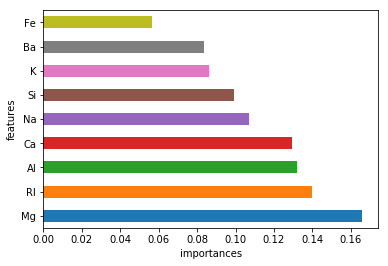

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.xlabel('importances')
plt.ylabel('features')
plt.show()

    NOTE:
        FROM THE ABOVE PLOT IT LOOKS LIKE ALL THE FEATURES ARE IMPORTANT IN THE MODEL
        HENCE, I HAVE INCLUDED ALL OF THEM AS REMOVING FEATURES NOT HELPED ME TO IMPROVE ACCYRACY

## TrainTestSplit

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## FeatureScaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

## Model Creation and Training

In [15]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(criterion='entropy',n_estimators=300,random_state = 42)
cls.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
# Predicting the Test set results
y_pred = cls.predict(X_test)

In [17]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 1, 7, 1],
      dtype=int64)

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
print(cm)

[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


## Accuracy

In [20]:
print('ACCURACY is ',cls.score(X_test,y_test)*100,'%')

ACCURACY is  81.3953488372093 %
